In [40]:
import matplotlib.pyplot as plt
import matplotlib.transforms
import numpy as np
import sympy as sy
from datetime import datetime
from math import *

In [41]:
def movexAxLabelTicks(ax, fig, factor):
    #plt.setp(ax.xaxis.get_majorticklabels()) 
    dx = factor/72.; dy = 0/72. 
    offset = matplotlib.transforms.ScaledTranslation(dx, dy, fig.dpi_scale_trans)
    for label in ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() - offset)

In [42]:
# PROMENNE - zde se zadava vetsina vstupnich hodnot


# Rozsah na ose x (viditelnost):
xOd = -3
xDo = 3

# Rozsah na ose y (viditelnost):
yOd = -1
yDo = 4

# Svislice:

svisla1 = -1     # ! Nastavit na 0, pokud se nepouziva
svisla2 = 1     # ! Nastavit na 0, pokud se nepouziva

# Funkce:
# Goniometricke vzorce atd. je nutne dosazovat jako numericky vypocitane pole hodnot, proto se musi pouzit napr. misto sin(x) np.sin(x)
# Pokud je funkce konstantni, napr. x = 2, musi byt navratova hodnota: return 2 + x - x     (x se vynuluje, ale matplotlib by to jinak nedokazal vykreslit)
# V pripade potreby lze pripsat definice dalsich funkci, pro svisle cary je nutne pouzit Svislice vyse

def f(x):
    return exp(1)**(x)

def g(x):
    return exp(1)**(-x)

def h(x):
    return exp(1) + x - x

# Barvy:

col1 = '#1CB1B3'
col2 = '#30EAEB'
col3 = '#5D9CE8'
col4 = '#2DFFD7'
col5 = '#1EB6EE'
col6 = 'aqua'

# Pismo (cisla, popisky os):
csfont = {'fontname':'Times New Roman'}

# Styly car ('solid' - tenka souvisla, 'dashed' - tenka carkovana, 'dotted' - tenka carkovana)
stylFce = 'solid'
stylSvisla = 'dashed'

# Ukladat obrazky s casovou stopou v nazvu (jinak se obrazek pri ulozeni vzdy prepise)
dtNazev = False

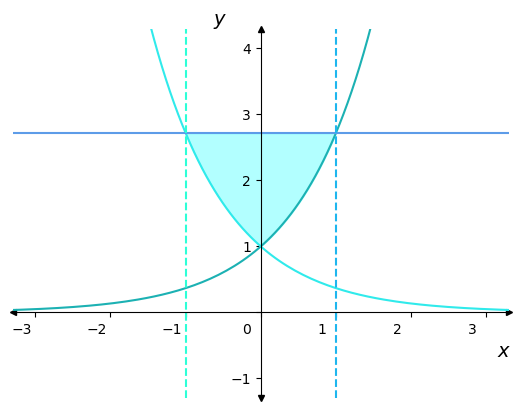

In [43]:
# Zde je vizualni nastaveni grafu, neni potreba tu cokoliv menit
x = np.linspace(xOd-1, xDo+1, 150)
fig, ax = plt.subplots()
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.xlim(xOd-0.3, xDo+0.3)
plt.ylim(yOd-0.3, yDo+0.3)
plt.xticks(np.arange(xOd, xDo+1, 1.0))
plt.yticks(np.arange(yOd, yDo+1, 1.0))

ax.yaxis.get_major_ticks()[-yOd].label1.set_visible(False)
ax.set_xlabel('x', loc='right', style='italic', **csfont, fontsize=14)
ax.set_ylabel('y', loc='top', rotation=0, style='italic', **csfont, fontsize=14)
plt.yticks(**csfont)
plt.xticks(**csfont)
ri = ax.plot((1), (0), ls="", marker=">", ms=4, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
up = ax.plot((0), (1), ls="", marker="^", ms=4, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
le = ax.plot((0), (0), ls="", marker="<", ms=4, color="k", transform=ax.get_yaxis_transform(), clip_on=False)
do = ax.plot((0), (0), ls="", marker="v", ms=4, color="k", transform=ax.get_xaxis_transform(), clip_on=False)
# Posune hodnoty na ose x doleva
movexAxLabelTicks(ax, fig, 40)


# Vykresli jednotlive funkce - staci zakomentovat, pokud funkce neni potreba
plt.plot(x, f(x), col1, linestyle=stylFce, label='f(x)')
plt.plot(x, g(x), col2, linestyle=stylFce, label='h(x)')
plt.plot(x, h(x), col3, linestyle=stylFce, label='g(x)')


# Svislice - nemusi se zakomentovat. Zobrazi se pouze, pokud je hodnota x ruzna od 0
if svisla1 != 0:
    ax.axvline(x = svisla1, color = col4, linestyle=stylSvisla)
if svisla2 != 0:
    ax.axvline(x = svisla2, color= col5, linestyle=stylSvisla)


# Vykresli obsah plochy mezi krivkami. Pokud je plocha ohranicena 3 a vice krivkami,
#   musi se plocha slozit z podploch (tam, kde se krivky krizi, tam na sebe plochy navazuji)
# 1. argument je vzdy x, 2. je prvni funkce, 3. je druha funkce (nastavit na 0, pokud je plocha zdola uzavrena osou x),
#   4. obsahuje prislusny interval pro vykresleni plochy
#plt.fill_between(x, f(x), g(x), where = [(x >= -pi/2-0.04) and (x <= np.pi/2) for x in x], color = col6, alpha = 0.4)
#plt.fill_between(x, 0, np.minimum(f(x),g(x)), where = [(x >= -np.pi/2) and (x <= np.pi/2) for x in x], color = col6, alpha = 0.4)
plt.fill_between(x, h(x), np.maximum(f(x),g(x)), where = [(x >= -1) and (x <= 1) for x in x], color = col6, alpha = 0.3)
#plt.fill_between(x, f(x), 0, where = [(x > 0) and (x < pi/2) for x in x], color = col6, alpha = 0.4)



# Vytvori .png soubor ve vyssim rozliseni
if dtNazev:
    plt.savefig(f'graf_{datetime.now().strftime("%Y%m%d_%H%M%S")}', dpi=400)
else:
    plt.savefig('graf.png', dpi=400)

# Posune hodnoty na ose x o kus zpet, aby se v nahledu s nizsi kvalitou zobrazily na spravnem miste
movexAxLabelTicks(ax, fig, -30)